In [8]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# data1

In [9]:
def calV_3D(N, theta, phi):
  V_max_list = np.array([1.4142135623730951, 3.9481594714802353, 7.666977259633668, 12.49614444572656, 18.511218397802732, 25.619490892577677, 33.89610553620064, 43.30531859956281, 53.851507919120344])
  V_max = V_max_list[N-2]
  # Calculate V (mass of external field)
  V = 0
  for i in range(N):
    for j in range(N):
      if i == j:
        continue
      a = [np.sin(theta[i])*np.cos(phi[i]), np.sin(theta[i])*np.sin(phi[i]), np.cos(theta[i])]
      b = [np.sin(theta[j])*np.cos(phi[j]), np.sin(theta[j])*np.sin(phi[j]), np.cos(theta[j])]
      cos_t = np.around(np.dot(a, b),10)
      t = (2-2*cos_t)**0.5
      V += t**0.5

  return 0.5*V/V_max

In [10]:
def MCrun1_3D(Vt, V, N, theta, phi):
  # Change one of spins
  i = np.random.randint(N)

  theta_new = np.copy(theta)

  phi_new = np.copy(phi)
  phi_new[i] += 0.01*random.choice([-1, 1])*np.pi
  if phi_new[i] > np.pi:
    phi_new[i] = -2*np.pi + phi_new[i]
  elif phi_new[i] <= -np.pi:
    phi_new[i] = 2*np.pi + phi_new[i]

  # Calculate the change of potential
  V_new = calV_3D(N, theta_new, phi_new)
  Vt_init = Vt - V
  Vt_new = Vt - V_new

  # Minimize the potential
  if (abs(Vt_init) > abs(Vt_new)):
    theta = theta_new
    phi = phi_new
    V = V_new

  return V, theta, phi

## score = 0

In [13]:
N = 3
MC_step = 100
ENS_step = 100

In [14]:
Score = 0
V_tar_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for V_tar in V_tar_lst:
  S_array = np.zeros((MC_step, ENS_step, N, 3))

  idx = 0
  while idx != 100:
    theta = (1/2*np.ones(N))*np.pi
    phi = 2*np.random.rand(N)*np.pi

    V = calV_3D(N, theta, phi)
    for _ in range(1000):
      V, theta, phi = MCrun1_3D(V_tar, V, N, theta, phi)
      if abs(calV_3D(N, theta, phi) - V_tar) < 0.001:
        for n in range(N):
          S_array[0,idx,n,:] = np.array([np.sin(theta[n])*np.cos(phi[n]), np.sin(theta[n])*np.sin(phi[n]), np.cos(theta[n])])
        idx += 1
        break

  with open(f"Sarray_N{N}_Score{Score}_Vt{V_tar}.pkl","wb") as f:
      pickle.dump(S_array, f)

## score = 0.5

In [15]:
N = 3
MC_step = 100
ENS_step = 100

In [16]:
Score = 0.5
V_tar_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for V_tar in V_tar_lst:
  S_array = np.zeros((MC_step, ENS_step, N, 3))

  idx = 0
  while idx != 100:
    theta = (1/3*np.ones(N))*np.pi
    phi = 2*np.random.rand(N)*np.pi

    V = calV_3D(N, theta, phi)
    for _ in range(1000):
      V, theta, phi = MCrun1_3D(V_tar, V, N, theta, phi)
      if abs(calV_3D(N, theta, phi) - V_tar) < 0.001:
        for n in range(N):
          S_array[0,idx,n,:] = np.array([np.sin(theta[n])*np.cos(phi[n]), np.sin(theta[n])*np.sin(phi[n]), np.cos(theta[n])])
        idx += 1
        break

  with open(f"Sarray_N{N}_Score{Score}_Vt{V_tar}.pkl","wb") as f:
      pickle.dump(S_array, f)

## score = -0.5

In [17]:
N = 3
MC_step = 100
ENS_step = 100

In [18]:
Score = -0.5
V_tar_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for V_tar in V_tar_lst:
  S_array = np.zeros((MC_step, ENS_step, N, 3))

  idx = 0
  while idx != 100:
    theta = (2/3*np.ones(N))*np.pi
    phi = 2*np.random.rand(N)*np.pi

    V = calV_3D(N, theta, phi)
    for _ in range(1000):
      V, theta, phi = MCrun1_3D(V_tar, V, N, theta, phi)
      if abs(calV_3D(N, theta, phi) - V_tar) < 0.001:
        for n in range(N):
          S_array[0,idx,n,:] = np.array([np.sin(theta[n])*np.cos(phi[n]), np.sin(theta[n])*np.sin(phi[n]), np.cos(theta[n])])
        idx += 1
        break

  with open(f"Sarray_N{N}_Score{Score}_Vt{V_tar}.pkl","wb") as f:
      pickle.dump(S_array, f)

# data2

In [19]:
def calV_3D(N, ens, mc, S_array):
  '''
  Calculate the diversity of group opinions.
  The value of 'calV_3D' is a kind of an electric potential energy,
  If a group has high energy, the group opinions are diverse: this point is different from the normal Thomson problem.
  '''

  # Choose the V_max which depends on the N
  V_max_list = np.array([1.4142135623730951, 3.9481594714802353, 7.666977259633668, 12.49614444572656, 18.511218397802732, 25.619490892577677, 33.89610553620064, 43.30531859956281, 53.851507919120344])
  V_max = V_max_list[N-2]

  # Calculate V (mass of external field)
  V = 0
  for i in range(N):
    for j in range(N):
      if i == j:
        continue
      a = S_array[mc,ens,i,:]
      b = S_array[mc,ens,j,:]
      cos_t = np.round(np.dot(a, b),10)
      t = (2-2*cos_t)**0.5
      V += t**0.5

  return 0.5*V/V_max

In [20]:
def run(Sarray, N, T, alpha, ENS_step, MC_step):
  '''
  N =         No. of agents
  alpha =     Exponent
  ENS_step =  Ensemble
  MC_step =   (Macro) Step
  '''
  S_array = Sarray
  V_array = np.zeros((MC_step, ENS_step))           # V(t)
  del_S_array = np.zeros((MC_step, ENS_step, N))       # delS(t)

  for mc in range(MC_step):
    for ens in range(ENS_step):

      # 1. Initialize
      if mc == 0:
        V_array[mc,ens] = calV_3D(N, ens, mc, S_array)

      # 2. Interact
      else:
        V = V_array[mc-1,ens]
        for i in range(N):
          # 1. Calculate Group Opinion (S_G)
          e = np.array([0.0, 0.0, 1.0])
          v_i = np.array([0.0, 0.0, 0.0])
          for j in range(N):
            si_sj = np.dot(S_array[mc-1,ens,i,:], S_array[mc-1,ens,j,:])
            v_ij = 0.5*(1+si_sj)*S_array[mc-1,ens,j,:]
            v_i += v_ij
          v_i += (N**alpha)*V*e
          v_i_n = np.linalg.norm(v_i)
          v_f = v_i/v_i_n

          # 2. Calculate Prob lambda
          if mc <= T:
            rT = np.sum(S_array[0:mc,ens,i,:], axis=0)
          else:
            rT = np.sum(S_array[mc-T:mc,ens,i,:], axis=0)
          M = np.linalg.norm(rT)
          Th = np.arccos(np.round(np.dot(rT/M, v_f),10))
          Lamb = 1/(1+M*Th)

          # 3. Spin
          p = np.random.rand()
          # 3-1. Change Spins
          if p <= Lamb:
            S_array[mc,ens,i,:] = v_f
          # 3-2. Retain Spins
          else:
            S_array[mc,ens,i,:] = S_array[mc-1,ens,i,:]
          del_S_array[mc,ens,i] = np.linalg.norm(S_array[mc,ens,i,:] - S_array[mc-1,ens,i,:])
          V_array[mc,ens] = calV_3D(N, ens, mc, S_array)

  return S_array, V_array, del_S_array

## score=0

In [21]:
N = 3
T = 10
alpha = 0.5                       # Exponent
MC_step = 100
ENS_step = 100

In [22]:
Score = 0
V_tar_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [23]:
for V_tar in V_tar_lst:
  S_array = []
  V_array = []
  del_S_array = []

  with open(f"Sarray_N{N}_Score{Score}_Vt{V_tar}.pkl","rb") as f:
    Sarray = pickle.load(f)

  S_array, V_array, del_S_array = run(Sarray, N, T, alpha, ENS_step, MC_step)

  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(S_array, f)
  with open(f"Varray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(V_array, f)
  with open(f"DelS_array_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(del_S_array, f)

## score=0.5

In [24]:
N = 3
T = 10
alpha = 0.5                       # Exponent
MC_step = 100
ENS_step = 100

In [25]:
Score = 0.5
V_tar_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [26]:
for V_tar in V_tar_lst:
  S_array = []
  V_array = []
  del_S_array = []

  with open(f"Sarray_N{N}_Score{Score}_Vt{V_tar}.pkl","rb") as f:
    Sarray = pickle.load(f)

  S_array, V_array, del_S_array = run(Sarray, N, T, alpha, ENS_step, MC_step)

  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(S_array, f)
  with open(f"Varray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(V_array, f)
  with open(f"DelS_array_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(del_S_array, f)

## score=-0.5

In [27]:
N = 3
T = 10
alpha = 0.5                       # Exponent
MC_step = 100
ENS_step = 100

In [28]:
Score = -0.5
V_tar_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [29]:
for V_tar in V_tar_lst:
  S_array = []
  V_array = []
  del_S_array = []

  with open(f"Sarray_N{N}_Score{Score}_Vt{V_tar}.pkl","rb") as f:
    Sarray = pickle.load(f)

  S_array, V_array, del_S_array = run(Sarray, N, T, alpha, ENS_step, MC_step)

  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(S_array, f)
  with open(f"Varray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(V_array, f)
  with open(f"DelS_array_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","wb") as f:
      pickle.dump(del_S_array, f)

# Plot

In [30]:
N = 3
T = 10
alpha = 0.5                       # Exponent
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

In [31]:
import matplotlib as mpl

cmap = mpl.colormaps['cividis']
colors = cmap(np.linspace(0, 1, 9))

Text(0.5, 0.075, 'time (t)')

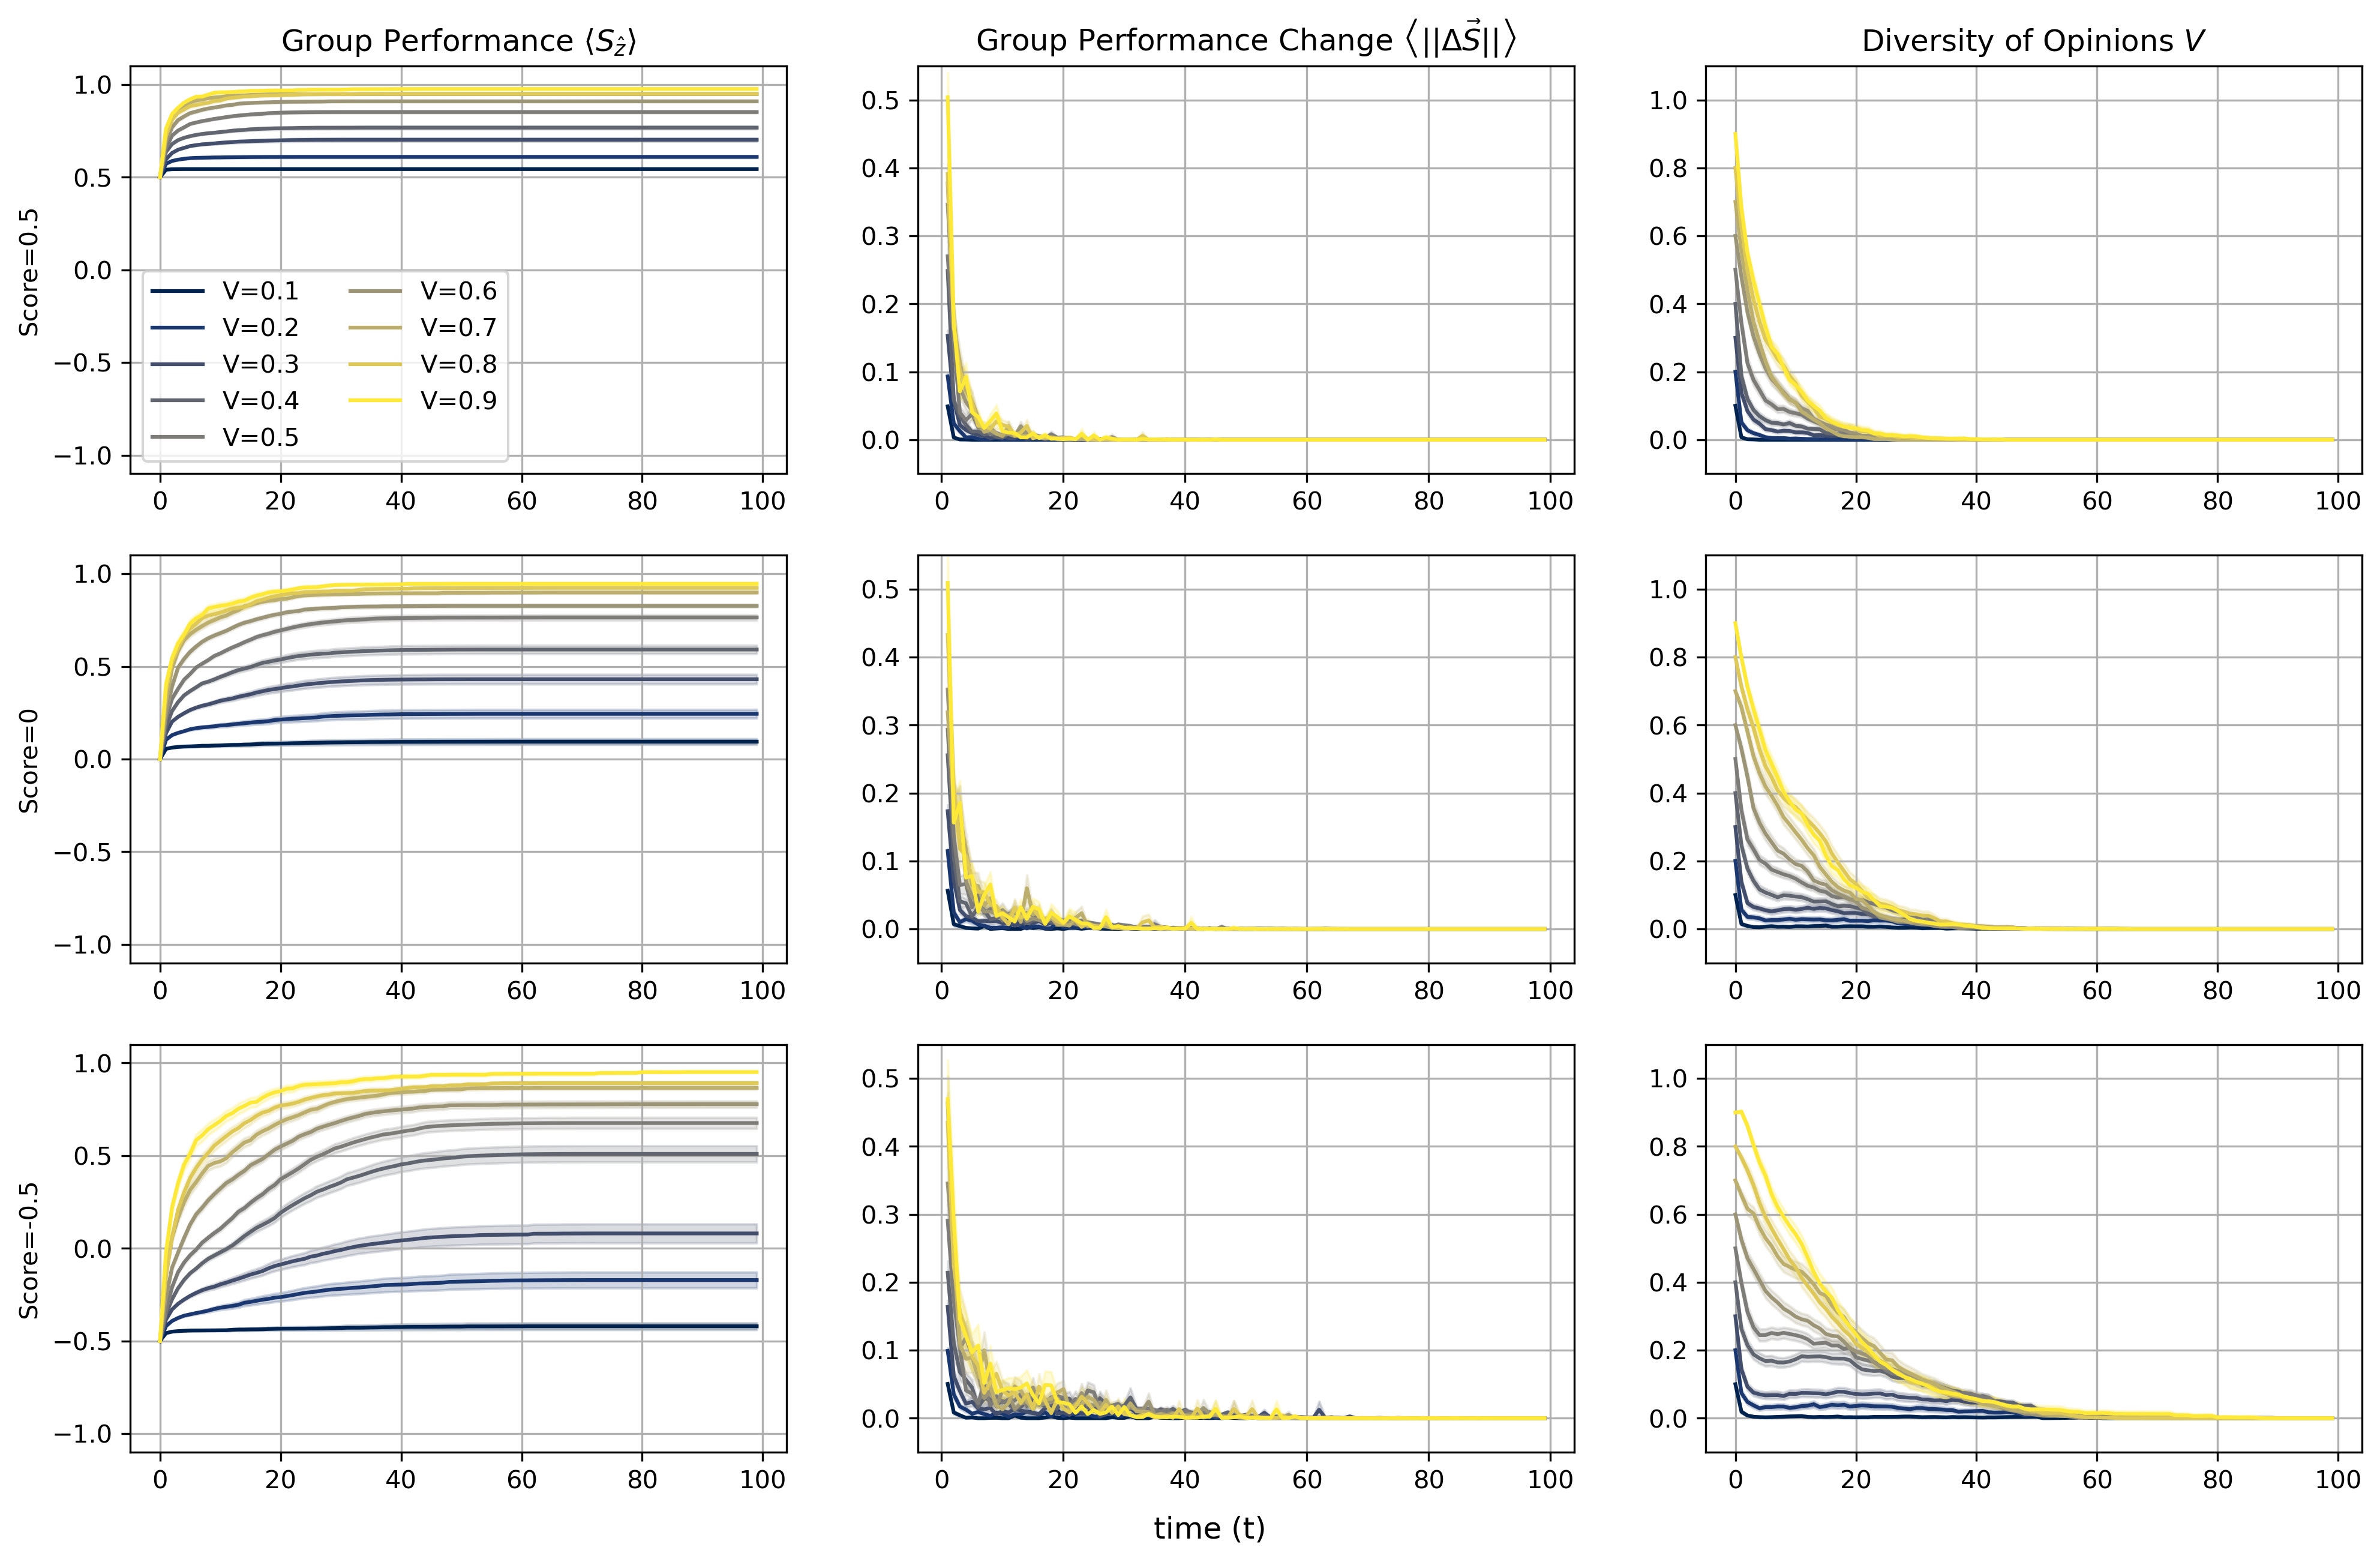

In [32]:
fig,axs = plt.subplots(3,3,figsize=(16,10), dpi=300)

t = np.arange(0, MC_step)

for i in range(3):
  axs[i, 0].set_ylim([-1.1,1.1])
  axs[i, 1].set_ylim([-0.05,0.55])
  axs[i, 2].set_ylim([-0.1,1.1])

Score = 0.5
S_array = []
V_array = []
del_S_array = []
for idx, V_tar in enumerate(V_tar_lst):
  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[0, 0].set_ylabel("Score=0.5")
axs[0, 0].set_title(r'Group Performance $\left\langle S_\hat{z} \right\rangle$')
for i, V_tar in enumerate(V_tar_lst):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0, 0].plot(t, Savg, '-', color=colors[i], label= f'V={V_tar}')
  axs[0, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[0, 0].legend(ncol=2)
axs[0, 0].grid()

axs[0, 1].set_title(r"Group Performance Change $\left\langle || \Delta \vec{S} || \right\rangle$")
for i, V_tar in enumerate(V_tar_lst):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[0, 1].plot(t[1:], delSavg, '-', color=colors[i])
  axs[0, 1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)
axs[0, 1].grid()

axs[0, 2].set_title(r'Diversity of Opinions $V$')
for i, V_tar in enumerate(V_tar_lst):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[0, 2].plot(t, Vavg, '-', color=colors[i])
  axs[0, 2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[0, 2].grid()


# N=5
Score = 0
S_array = []
V_array = []
del_S_array = []
for idx, V_tar in enumerate(V_tar_lst):
  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[1, 0].set_ylabel("Score=0")
for i, V_tar in enumerate(V_tar_lst):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1, 0].plot(t, Savg, '-', color=colors[i])
  axs[1, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[1, 0].grid()

for i, V_tar in enumerate(V_tar_lst):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[1, 1].plot(t[1:], delSavg, '-', color=colors[i])
  axs[1, 1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)
axs[1, 1].grid()

for i, V_tar in enumerate(V_tar_lst):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[1, 2].plot(t, Vavg, '-', color=colors[i])
  axs[1, 2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[1, 2].grid()


# N=10
Score = -0.5
S_array = []
V_array = []
del_S_array = []
for idx, V_tar in enumerate(V_tar_lst):
  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    S_array.append(pickle.load(f))
  with open(f"Varray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    V_array.append(pickle.load(f))
  with open(f"DelS_array_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    del_S_array.append(pickle.load(f))

axs[2, 0].set_ylabel("Score=-0.5")
for i, V_tar in enumerate(V_tar_lst):
  Savg = np.array([S_array[i][mc, :, :,2].mean(1).mean() for mc in range(MC_step)])
  Sstd = np.array([np.std(S_array[i][mc, :, :,2].mean(1))/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2, 0].plot(t, Savg, '-', color=colors[i])
  axs[2, 0].fill_between(t, Savg - Sstd, Savg + Sstd, color=colors[i], alpha = 0.2)
axs[2, 0].grid()

for i, V_tar in enumerate(V_tar_lst):
  delSavg = np.array([del_S_array[i][mc,:,0].mean() for mc in range(1,MC_step)])
  delSstd = np.array([np.std(del_S_array[i][mc,:,0])/(ENS_step**0.5) for mc in range(1,MC_step)])
  axs[2, 1].plot(t[1:], delSavg, '-', color=colors[i])
  axs[2, 1].fill_between(t[1:], delSavg - delSstd, delSavg + delSstd, color=colors[i], alpha = 0.2)
axs[2, 1].grid()

for i, V_tar in enumerate(V_tar_lst):
  Vavg = np.array([V_array[i][mc,:].mean() for mc in range(MC_step)])
  Vstd = np.array([np.std(V_array[i][mc,:])/(ENS_step**0.5) for mc in range(MC_step)])
  axs[2, 2].plot(t, Vavg, '-', color=colors[i])
  axs[2, 2].fill_between(t, Vavg - Vstd, Vavg + Vstd, color=colors[i], alpha = 0.2)
axs[2, 2].grid()

fig.suptitle("time (t)", y = 0.075)

In [33]:
N = 3                             # No. of agents
T = 10
alpha = 0.5
ENS_step = 100                    # Ensemble
MC_step = 100                     # (Macro) Step

In [35]:
NH_avg = []
NH_std = []
Score = 0.5
for V_tar in V_tar_lst:
  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    lst = pickle.load(f)
  NH_avg.append(lst[-1, :, :,2].mean(1).mean())
  NH_std.append(np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))
    
AR_avg = []
AR_std = []
Score = 0
for V_tar in V_tar_lst:
  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    lst = pickle.load(f)
  AR_avg.append(lst[-1, :, :,2].mean(1).mean())
  AR_std.append(np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

SH_avg = []
SH_std = []
Score = -0.5
for V_tar in V_tar_lst:
  with open(f"Sarray_N{N}_Score{Score}_T{T}_alpha{alpha}_{V_tar}.pkl","rb") as f:
    lst = pickle.load(f)
  SH_avg.append(lst[-1, :, :,2].mean(1).mean())
  SH_std.append(np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

In [36]:
NH_avg = np.array(NH_avg)
NH_std = np.array(NH_std)

AR_avg = np.array(AR_avg)
AR_std = np.array(AR_std)

SH_avg = np.array(SH_avg)
SH_std = np.array(SH_std)

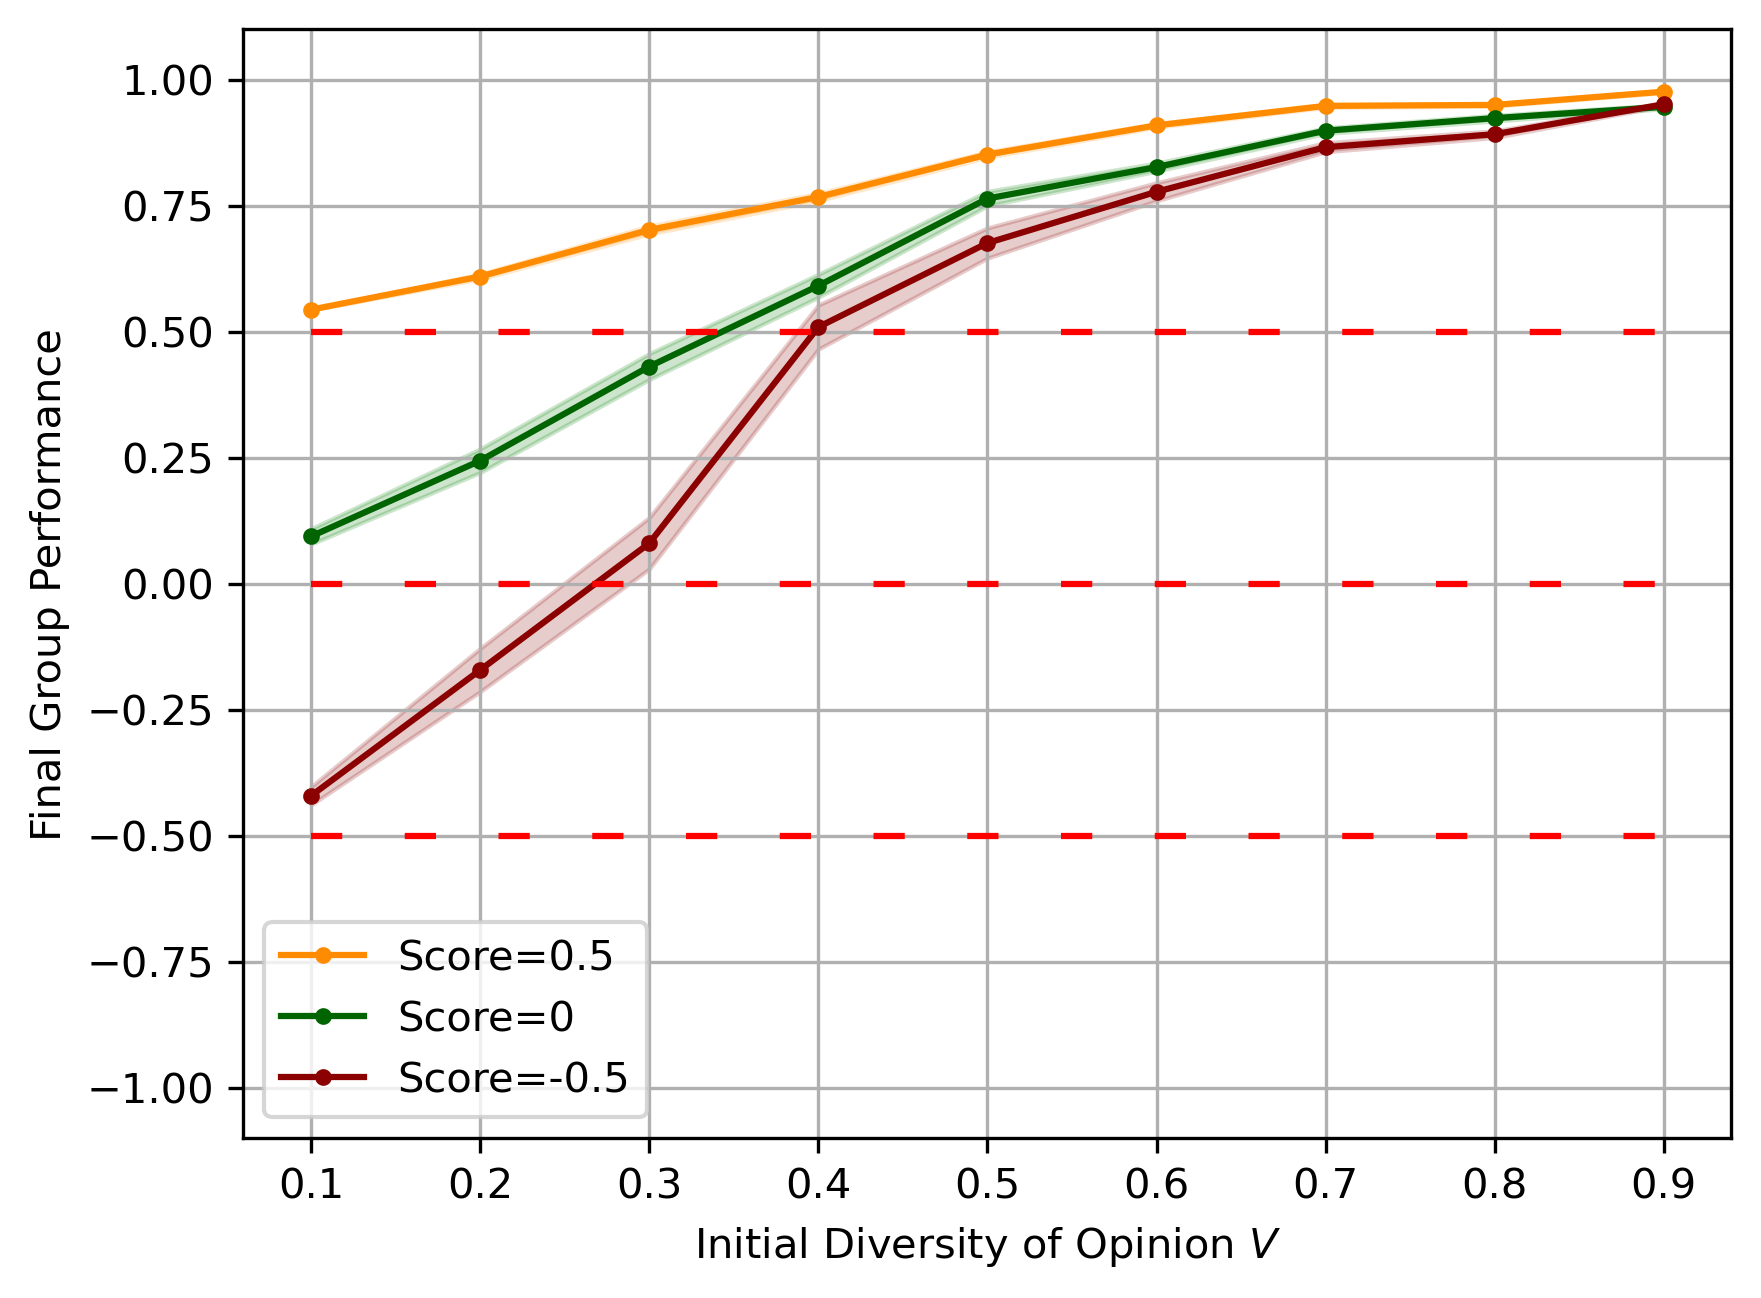

In [49]:
plt.figure(dpi=300)

plt.plot(V_tar_lst, NH_avg, color='darkorange', marker='.', label='Score=0.5')
plt.fill_between(V_tar_lst, NH_avg - NH_std, NH_avg + NH_std, color='darkorange', alpha = 0.2)

plt.plot(V_tar_lst, AR_avg, color='darkgreen', marker='.', label='Score=0')
plt.fill_between(V_tar_lst, AR_avg - AR_std, AR_avg + AR_std, color='green', alpha = 0.2)

plt.plot(V_tar_lst, SH_avg, color='darkred', marker='.', label='Score=-0.5')
plt.fill_between(V_tar_lst, SH_avg - SH_std, SH_avg + SH_std, color='darkred', alpha = 0.2)

plt.xlabel(r'Initial Diversity of Opinion $V$')
plt.ylabel('Final Group Performance')

plt.plot(V_tar_lst, [0 for _ in range(len(V_tar_lst))], color='red', linestyle=(0, (5, 10)))
plt.plot(V_tar_lst, [0.5 for _ in range(len(V_tar_lst))], color='red', linestyle=(0, (5, 10)))
plt.plot(V_tar_lst, [-0.5 for _ in range(len(V_tar_lst))], color='red', linestyle=(0, (5, 10)))

plt.ylim([-1.1, 1.1])
plt.legend()
plt.grid()

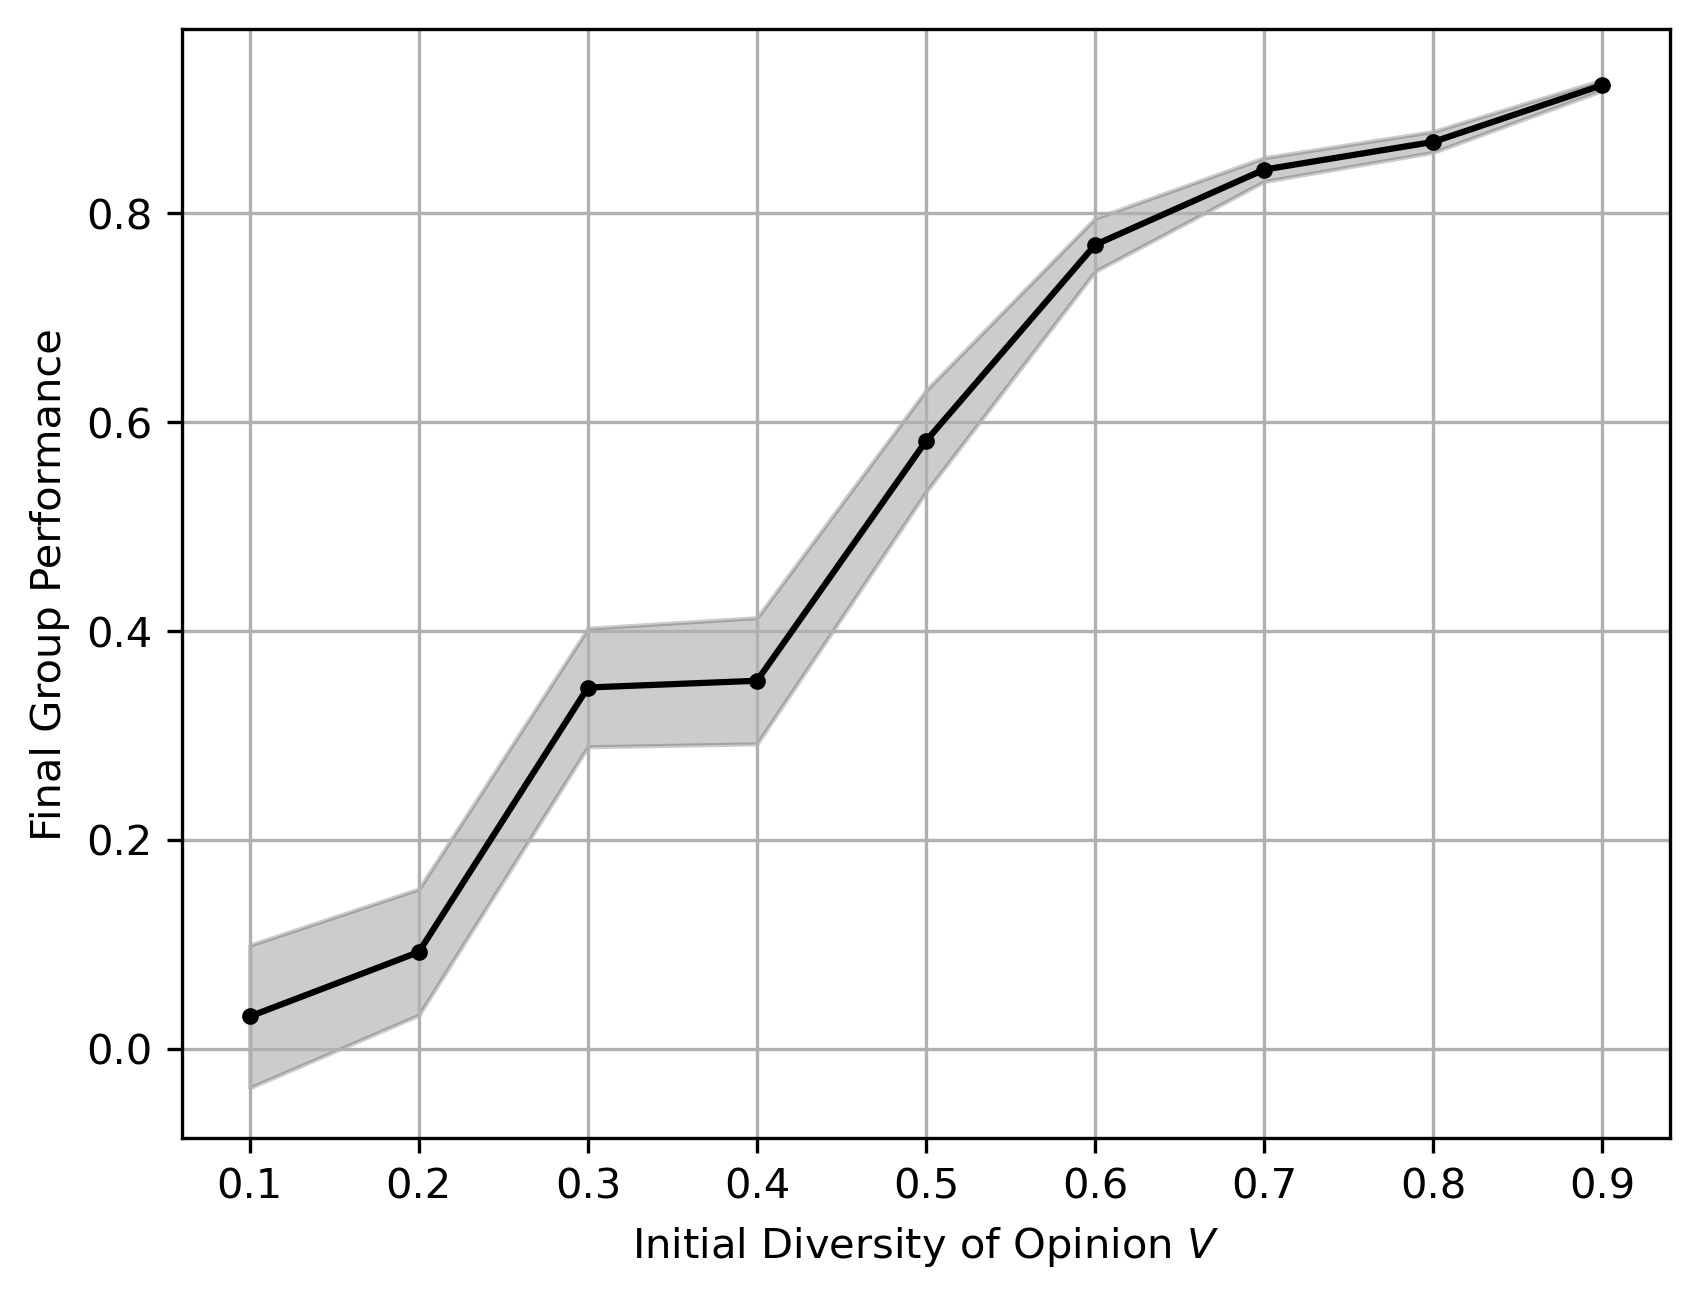

In [23]:
plt.figure(dpi=300)

plt.plot(V_tar_lst, V_avg, color='k', marker='.')
plt.fill_between(V_tar_lst, V_avg - V_std, V_avg + V_std, color='k', alpha = 0.2)

plt.xlabel(r'Initial Diversity of Opinion $V$')
plt.ylabel('Final Group Performance')

plt.grid()